Dataset: https://archive.ics.uci.edu/ml/datasets/Mushroom

<b>Data Set Information:</b>

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

<b>Attribute Information:</b>

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s<br>
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s<br>
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y<br>
4. bruises?: bruises=t,no=f<br>
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s<br>
6. gill-attachment: attached=a,descending=d,free=f,notched=n<br>
7. gill-spacing: close=c,crowded=w,distant=d<br>
8. gill-size: broad=b,narrow=n<br>
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y<br>
10. stalk-shape: enlarging=e,tapering=t<br>
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?<br>
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s<br>
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s<br>
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y<br>
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y<br>
16. veil-type: partial=p,universal=u<br>
17. veil-color: brown=n,orange=o,white=w,yellow=y<br>
18. ring-number: none=n,one=o,two=t<br>
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z<br>
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y<br>
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y<br>
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d<br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVC

import os

In [4]:
os.chdir("C:/Users/SANKET/Music/Practice Project/Mushroom dataset")

In [5]:
mush_data= pd.read_csv("agaricus-lepiota.data",header=None)
mush_data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
mush_data.shape

(8124, 23)

<b>Observation:</b>
<li> There are 8124 rows and 23 columns in the dataset.</li>

In [7]:
# Lets give names to the dataset

mush_data.columns= ["type", "cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]
mush_data

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [8]:
mush_data.columns

Index(['type', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
mush_data.dtypes

type                        object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

<b>Observation:</b>
<li> All the attributes in the dataset are categorical.</li>

<b>Display the number of missing values(if any) in each of the attributes.</b>

In [10]:
mush_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
type                        8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [88]:
mush_data.isnull().sum()

type                        0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<b>Observation:</b>
<li> There are no missing in the dataset.</li>

<b>Summary Statistics</b>

In [89]:
mush_data.describe()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Data Visualization

<b>Bi-Variate Analysis</b>

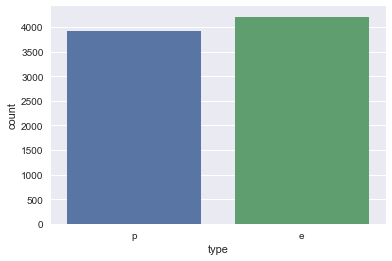

In [90]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="type", data=mush_data)
plt.show()

In [91]:
mush_data["type"].value_counts()

e    4208
p    3916
Name: type, dtype: int64

<b>Observation:</b>
<li> Out of 8214 observations, ~51% are edible and ~49 are poisonous.</li>

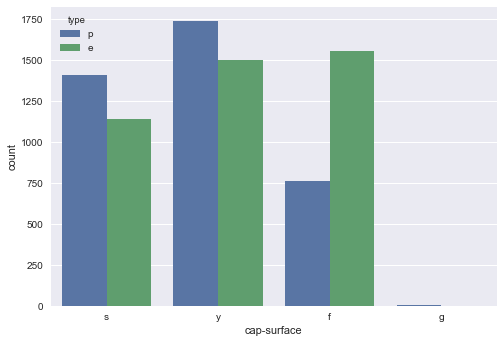

In [31]:
# Lets count the each type of mushroom with its cap-surface in the dataset
sns.countplot(x="cap-surface", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more poisonous mushroom with scaly cap-surface.</li>

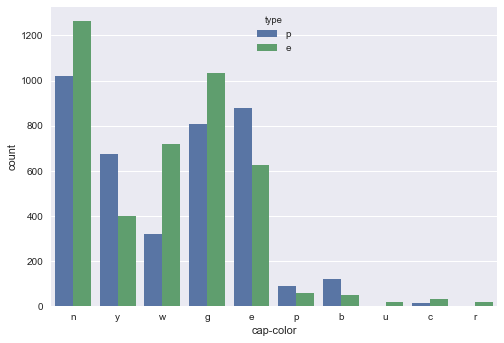

In [32]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="cap-color", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more edible mushroom with brown cap-color.</li>

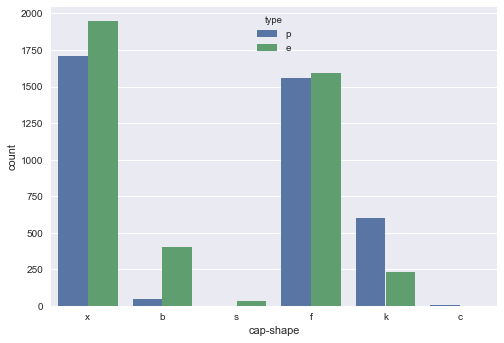

In [39]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="cap-shape", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more edible mushroom with flat cap-shape.</li>

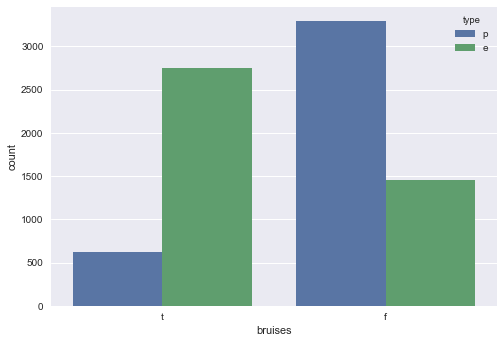

In [40]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="bruises", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more poisonous mushroom with no bruises.</li>

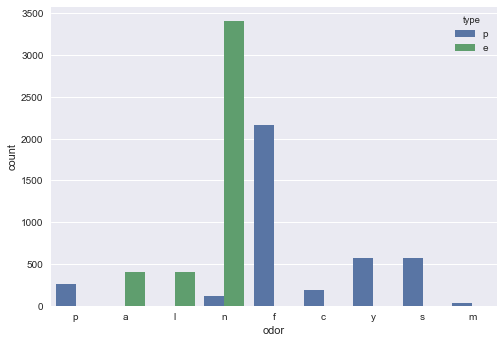

In [41]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="odor", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more edible mushroom with no odor.</li>

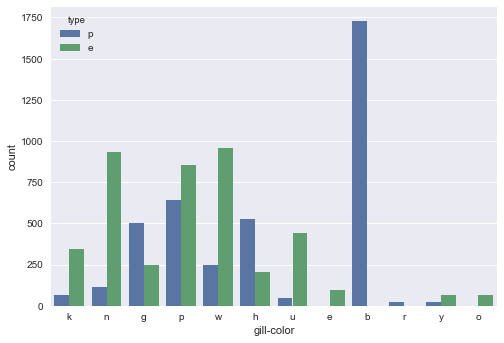

In [42]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="gill-color", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more poisonous mushroom with buff gill-color.</li>

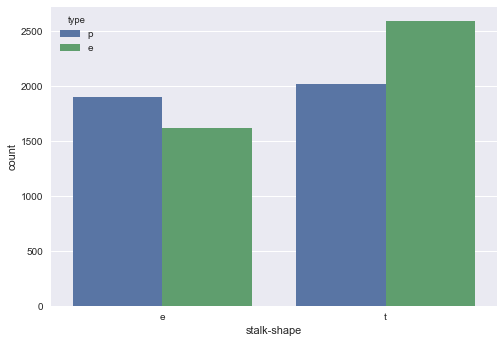

In [43]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="stalk-shape", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more edible mushroom with tappering stalk-shape.</li>

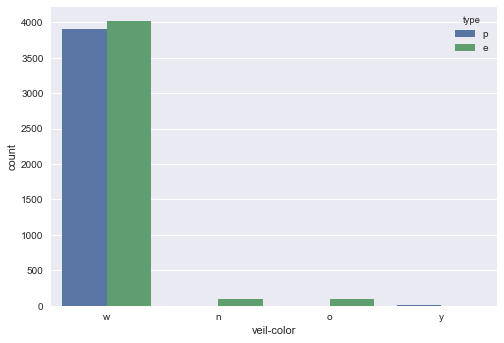

In [44]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="veil-color", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more edible mushroom with white veil-color.</li>

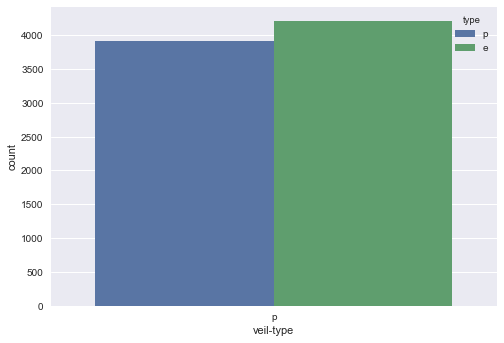

In [45]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="veil-type", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more edible mushroom with partial veil-type.</li>

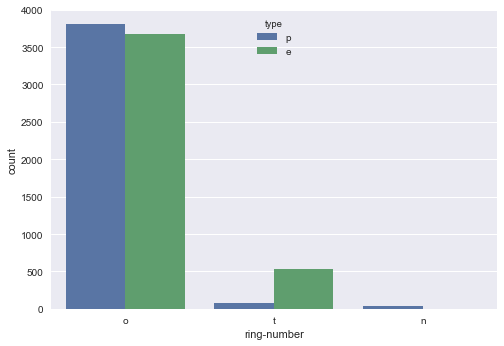

In [47]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="ring-number", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more poisonous mushroom with one ring-number.</li>

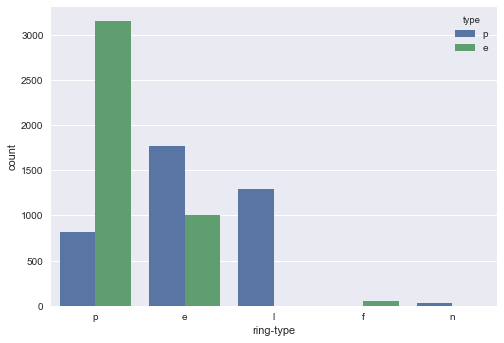

In [50]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="ring-type", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more edible mushroom with pendant ring-type.</li>

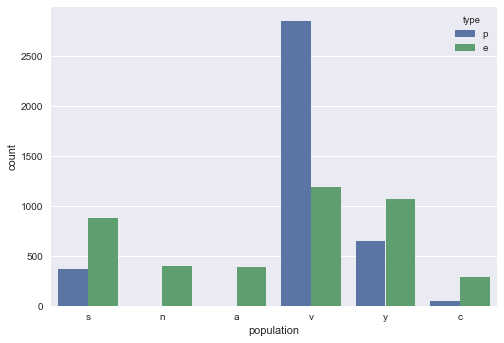

In [46]:
# Lets count the each type of mushroom in the dataset
sns.countplot(x="population", data=mush_data,hue="type")
plt.show()

<b>Observation:</b>
<li> In the dataset, there are more poisonous mushroom with several population.</li>

<b>Dividing the dataset into independent and dependent</b>

In [11]:
X= mush_data.drop("type",axis=1)
y= mush_data[["type"]]

<b>Getting dummy variables</b>

In [12]:
X= pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
LE=LabelEncoder()
y=LE.fit_transform(y)

<b>Checking outliers in the dataset.</b>

In [14]:
# Check whether their are outliers present in the dataset or not
from scipy import stats
from scipy.stats import zscore
z = np.abs(stats.zscore(X))
print(z)

[[0.02219484 0.79620985 0.33687808 ... 0.40484176 4.59086996 0.15558197]
 [0.02219484 0.79620985 0.33687808 ... 0.40484176 0.21782364 0.15558197]
 [0.02219484 0.79620985 0.33687808 ... 0.40484176 0.21782364 0.15558197]
 ...
 [0.02219484 1.2559503  0.33687808 ... 0.40484176 0.21782364 0.15558197]
 [0.02219484 0.79620985 2.96843295 ... 0.40484176 0.21782364 0.15558197]
 [0.02219484 0.79620985 0.33687808 ... 0.40484176 0.21782364 0.15558197]]


In [15]:
threshold = 3
print(np.where(z > 3))

(array([   0,    0,    0, ..., 8123, 8123, 8123], dtype=int64), array([23, 32, 93, ..., 68, 79, 84], dtype=int64))


In [16]:
print(z[21][1])

0.7962098471356557


<b>Observation:</b>
<li> The z-score is less than 3.Hence, outlier is not present.</li>

In [17]:
# Lets bring the dataset features into same scle
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Dimensionality deduction</b>

In [18]:
# We are using Principal Component Analysis

from sklearn.decomposition import PCA
pca=PCA(n_components=60)
principal_components=pca.fit_transform(X)

In [19]:
# Information after dimensionality reduction'

sum(pca.explained_variance_ratio_)

0.9749529356366536

<b>Splitting the data into train and test into (70:30)</b>

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30,stratify=y)

In [21]:
# We will use f1 score as the metrics 
def f1_mscore(m,X,y):
    f1_mscore=0
    r_s=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        m.fit(X_train,y_train)
        y_pred= m.predict(X_test)
        score=f1_score(y_test,y_pred)
        print("Random State:",r_state," and F1 Score:",score)
        if score>f1_mscore:
            f1_mscore=score
            r_s=r_state
    print("Maximum F1_Score is at random_state:",r_s," and it is :",round((f1_mscore),3))

# Machine Learning Models

As it is classification problem, we will use Logistic Regression, KNN(K-Nearest Neighbor), DecisionTreeClassifier,RandomForestClassifier, NaiveBayesClassifier, Support Vector Machine, XG Boost and Gradient Boosting Classifier. 

<b>Logistic Regression</b>

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
f1_mscore(lr,principal_components,y)

Random State: 42  and F1 Score: 0.9991482112436115
Random State: 43  and F1 Score: 0.9995742869306087
Random State: 44  and F1 Score: 0.9982949701619779
Random State: 45  and F1 Score: 1.0
Random State: 46  and F1 Score: 1.0
Random State: 47  and F1 Score: 1.0
Random State: 48  and F1 Score: 0.9995742869306087
Random State: 49  and F1 Score: 1.0
Random State: 50  and F1 Score: 0.9995742869306087
Random State: 51  and F1 Score: 0.9995742869306087
Random State: 52  and F1 Score: 1.0
Random State: 53  and F1 Score: 1.0
Random State: 54  and F1 Score: 0.9991482112436115
Random State: 55  and F1 Score: 0.9995742869306087
Random State: 56  and F1 Score: 0.9995742869306087
Random State: 57  and F1 Score: 0.9995742869306087
Random State: 58  and F1 Score: 1.0
Random State: 59  and F1 Score: 0.9995742869306087
Random State: 60  and F1 Score: 0.9995742869306087
Random State: 61  and F1 Score: 0.9995742869306087
Random State: 62  and F1 Score: 0.9995742869306087
Random State: 63  and F1 Score: 0.

In [23]:
from sklearn.model_selection import cross_val_score
mf_lr=cross_val_score(lr, principal_components,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(lr, principal_components,y,cv=5,scoring="f1").mean())
mf_slr= cross_val_score(lr, principal_components,y,cv=5,scoring="f1").std()
print("standard deviation for logistic from mean f1 score is",cross_val_score(lr,principal_components,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.9313737560108729
standard deviation for logistic from mean f1 score is 0.08733821044769585


<b>KNN (K-Nearest Neighbor Classifier)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
knn1= GridSearchCV(knn, neighbors, cv=5,scoring="f1")
knn1.fit(principal_components,y)
knn1.best_params_

{'n_neighbors': 15}

In [27]:
knn=KNeighborsClassifier(n_neighbors=15)
f1_mscore(knn,principal_components,y)

Random State: 42  and F1 Score: 0.9982949701619779
Random State: 43  and F1 Score: 0.9987217724755006
Random State: 44  and F1 Score: 0.9982949701619779
Random State: 45  and F1 Score: 0.9995742869306087
Random State: 46  and F1 Score: 0.9991482112436115
Random State: 47  and F1 Score: 0.9991482112436115
Random State: 48  and F1 Score: 0.9995742869306087
Random State: 49  and F1 Score: 0.9952971355280035
Random State: 50  and F1 Score: 0.9995742869306087
Random State: 51  and F1 Score: 0.9991482112436115
Random State: 52  and F1 Score: 0.9991482112436115
Random State: 53  and F1 Score: 0.9995742869306087
Random State: 54  and F1 Score: 0.9982949701619779
Random State: 55  and F1 Score: 0.9953330504879084
Random State: 56  and F1 Score: 0.9991482112436115
Random State: 57  and F1 Score: 0.9991482112436115
Random State: 58  and F1 Score: 0.9948674080410608
Random State: 59  and F1 Score: 0.9987217724755006
Random State: 60  and F1 Score: 0.9987217724755006
Random State: 61  and F1 Score:

In [28]:
from sklearn.model_selection import cross_val_score
mf_knn=cross_val_score(knn, principal_components,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(knn, principal_components,y,cv=5,scoring="f1").mean())
mf_sknn= cross_val_score(knn, principal_components,y,cv=5,scoring="f1").std()
print("standard deviation for KNN from mean f1 score is",cross_val_score(knn, principal_components,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.931136893453947
standard deviation for KNN from mean f1 score is 0.07992341102140633


<b>Decision Tree Classifier</b>

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

f1_mscore(dt,principal_components,y)

Random State: 42  and F1 Score: 0.9649198787353832
Random State: 43  and F1 Score: 0.9854824935952178
Random State: 44  and F1 Score: 0.9632224168126094
Random State: 45  and F1 Score: 0.9781397342477497
Random State: 46  and F1 Score: 0.9657534246575343
Random State: 47  and F1 Score: 0.9801553062985332
Random State: 48  and F1 Score: 0.9851253718657034
Random State: 49  and F1 Score: 0.9827882960413082
Random State: 50  and F1 Score: 0.9783737024221454
Random State: 51  and F1 Score: 0.9819587628865979
Random State: 52  and F1 Score: 0.9799402475458814
Random State: 53  and F1 Score: 0.9797675419715884
Random State: 54  and F1 Score: 0.9833404527979496
Random State: 55  and F1 Score: 0.9690631808278867
Random State: 56  and F1 Score: 0.9599651871192342
Random State: 57  and F1 Score: 0.9836488812392427
Random State: 58  and F1 Score: 0.9818809318377912
Random State: 59  and F1 Score: 0.9832976445396147
Random State: 60  and F1 Score: 0.9640848117697965
Random State: 61  and F1 Score:

In [33]:
from sklearn.model_selection import cross_val_score
mf_dt=cross_val_score(dt,principal_components,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(dt, principal_components,y,cv=5,scoring="f1").mean())
mf_sdt= cross_val_score(dt,principal_components,y,cv=5,scoring="f1").std()
print("standard deviation for Decision Tree Classifier from mean f1 score is",cross_val_score(dt,principal_components,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.8285919399597773
standard deviation for Decision Tree Classifier from mean f1 score is 0.1555597128188806


<b>Random Forest Classifier</b>

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,200,300,400,500]}
rf= RandomForestClassifier()
rf1= GridSearchCV(rf, parameters, cv=5, scoring="f1")
rf1.fit(principal_components, y)
rf1.best_params_

{'n_estimators': 10}

In [40]:
rf1=RandomForestClassifier(n_estimators=10)
f1_mscore(rf1,principal_components,y)

Random State: 42  and F1 Score: 0.9995742869306087
Random State: 43  and F1 Score: 0.9995742869306087
Random State: 44  and F1 Score: 0.9978678038379531
Random State: 45  and F1 Score: 1.0
Random State: 46  and F1 Score: 1.0
Random State: 47  and F1 Score: 1.0
Random State: 48  and F1 Score: 1.0
Random State: 49  and F1 Score: 0.9995742869306087
Random State: 50  and F1 Score: 1.0
Random State: 51  and F1 Score: 1.0
Random State: 52  and F1 Score: 1.0
Random State: 53  and F1 Score: 1.0
Random State: 54  and F1 Score: 0.9987228607918264
Random State: 55  and F1 Score: 0.9995742869306087
Random State: 56  and F1 Score: 0.9995742869306087
Random State: 57  and F1 Score: 0.9991482112436115
Random State: 58  and F1 Score: 1.0
Random State: 59  and F1 Score: 0.9995742869306087
Random State: 60  and F1 Score: 0.9995742869306087
Random State: 61  and F1 Score: 0.9995742869306087
Random State: 62  and F1 Score: 0.9995742869306087
Random State: 63  and F1 Score: 1.0
Random State: 64  and F1 Sco

In [41]:
from sklearn.model_selection import cross_val_score
mf_rf=cross_val_score(rf1, principal_components,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(rf1, principal_components,y,cv=5,scoring="f1").mean())
mf_srf= cross_val_score(rf1, principal_components,y,cv=5,scoring="f1").std()
print("standard deviation for Random Forest from mean f1 score is",cross_val_score(rf1,principal_components,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.9116604562688468
standard deviation for Random Forest from mean f1 score is 0.09756817150094507


<b>Naive Bayes Classifier</b>

In [42]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
f1_mscore(nb,principal_components,y)

Random State: 42  and F1 Score: 0.6945531146554319
Random State: 43  and F1 Score: 0.693631150015092
Random State: 44  and F1 Score: 0.6975345760673483
Random State: 45  and F1 Score: 0.701722574796011
Random State: 46  and F1 Score: 0.6968973747016707
Random State: 47  and F1 Score: 0.6961758506473953
Random State: 48  and F1 Score: 0.6901748040988547
Random State: 49  and F1 Score: 0.693325315694528
Random State: 50  and F1 Score: 0.6908874329958309
Random State: 51  and F1 Score: 0.7010372178157414
Random State: 52  and F1 Score: 0.695888754534462
Random State: 53  and F1 Score: 0.7020433058859409
Random State: 54  and F1 Score: 0.6891609435652434
Random State: 55  and F1 Score: 0.6983358547655069
Random State: 56  and F1 Score: 0.7007564296520425
Random State: 57  and F1 Score: 0.6985761890336263
Random State: 58  and F1 Score: 0.6873693639892506
Random State: 59  and F1 Score: 0.6959134615384616
Random State: 60  and F1 Score: 0.695809466385288
Random State: 61  and F1 Score: 0.69

In [59]:
from sklearn.model_selection import cross_val_score
mf_nb=cross_val_score(nb, principal_components,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(nb, principal_components,y,cv=5,scoring="f1").mean())
mf_snb= cross_val_score(nb, principal_components,y,cv=5,scoring="f1").std()
print("standard deviation for Gaussian NB from mean f1 score is",cross_val_score(nb,principal_components,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.6674098904581915
standard deviation for Gaussian NB from mean f1 score is 0.04518186139775729


<b>Support Vector Machine(SVM)</b>

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
sv=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
sv1 = GridSearchCV(sv, parameters, cv=5,scoring="f1")
sv1.fit(principal_components,y)
sv1.best_params_

{'C': 1, 'kernel': 'poly'}

In [46]:
sv1=SVC(kernel="poly",C=1,probability=True)
f1_mscore(sv1,principal_components,y)

Random State: 42  and F1 Score: 0.9987217724755006
Random State: 43  and F1 Score: 1.0
Random State: 44  and F1 Score: 0.9982949701619779
Random State: 45  and F1 Score: 1.0
Random State: 46  and F1 Score: 1.0
Random State: 47  and F1 Score: 1.0
Random State: 48  and F1 Score: 1.0
Random State: 49  and F1 Score: 1.0
Random State: 50  and F1 Score: 1.0
Random State: 51  and F1 Score: 1.0
Random State: 52  and F1 Score: 1.0
Random State: 53  and F1 Score: 1.0
Random State: 54  and F1 Score: 0.9991482112436115
Random State: 55  and F1 Score: 1.0
Random State: 56  and F1 Score: 1.0
Random State: 57  and F1 Score: 1.0
Random State: 58  and F1 Score: 1.0
Random State: 59  and F1 Score: 1.0
Random State: 60  and F1 Score: 1.0
Random State: 61  and F1 Score: 1.0
Random State: 62  and F1 Score: 1.0
Random State: 63  and F1 Score: 1.0
Random State: 64  and F1 Score: 0.9991482112436115
Random State: 65  and F1 Score: 1.0
Random State: 66  and F1 Score: 1.0
Random State: 67  and F1 Score: 0.999148

In [47]:
from sklearn.model_selection import cross_val_score
mf_sv=cross_val_score(sv1, principal_components,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(sv1,principal_components,y,cv=5,scoring="f1").mean())
mf_ssv= cross_val_score(sv1,principal_components ,y,cv=5,scoring="f1").std()
print("standard deviation for SVM from mean f1 score is",cross_val_score(sv1,principal_components,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.9409026134258041
standard deviation for SVM from mean f1 score is 0.07785279665275567


<b>XG Boost</b>

In [48]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
f1_mscore(xg,principal_components,y)

Random State: 42  and F1 Score: 0.9991482112436115
Random State: 43  and F1 Score: 1.0
Random State: 44  and F1 Score: 0.9982949701619779
Random State: 45  and F1 Score: 0.9995742869306087
Random State: 46  and F1 Score: 1.0
Random State: 47  and F1 Score: 0.9995742869306087
Random State: 48  and F1 Score: 0.9995742869306087
Random State: 49  and F1 Score: 0.9995742869306087
Random State: 50  and F1 Score: 0.9995742869306087
Random State: 51  and F1 Score: 0.9995742869306087
Random State: 52  and F1 Score: 0.9995742869306087
Random State: 53  and F1 Score: 1.0
Random State: 54  and F1 Score: 0.9991482112436115
Random State: 55  and F1 Score: 0.9995742869306087
Random State: 56  and F1 Score: 0.9995742869306087
Random State: 57  and F1 Score: 0.9995742869306087
Random State: 58  and F1 Score: 1.0
Random State: 59  and F1 Score: 0.9991489361702127
Random State: 60  and F1 Score: 0.9995742869306087
Random State: 61  and F1 Score: 0.9987239472564866
Random State: 62  and F1 Score: 0.998721

In [49]:
from sklearn.model_selection import cross_val_score
mf_xg=cross_val_score(xg, principal_components,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(xg, principal_components,y,cv=5,scoring="f1").mean())
mf_sxg= cross_val_score(xg, principal_components,y,cv=5,scoring="f1").std()
print("standard deviation for XG Boost from mean f1 score is",cross_val_score(xg, principal_components,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.8882706608710695
standard deviation for XG Boost from mean f1 score is 0.1288673196360879


<b>Gradient Boosting</b>

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.06, max_depth=5)

f1_mscore(gbcl,principal_components,y)

Random State: 42  and F1 Score: 0.9957337883959045
Random State: 43  and F1 Score: 0.9970149253731343
Random State: 44  and F1 Score: 0.9970123772940674
Random State: 45  and F1 Score: 0.9970149253731343
Random State: 46  and F1 Score: 0.9953091684434967
Random State: 47  and F1 Score: 0.9965870307167235
Random State: 48  and F1 Score: 0.9987217724755006
Random State: 49  and F1 Score: 0.9991482112436115
Random State: 50  and F1 Score: 0.9978696207925011
Random State: 51  and F1 Score: 0.9965870307167235
Random State: 52  and F1 Score: 0.9970149253731343
Random State: 53  and F1 Score: 0.9974402730375427
Random State: 54  and F1 Score: 0.9974424552429667
Random State: 55  and F1 Score: 0.9978678038379531
Random State: 56  and F1 Score: 0.9965899403239556
Random State: 57  and F1 Score: 0.9970149253731343
Random State: 58  and F1 Score: 0.9970123772940674
Random State: 59  and F1 Score: 0.9970200085142614
Random State: 60  and F1 Score: 0.9982964224872232
Random State: 61  and F1 Score:

In [51]:
from sklearn.model_selection import cross_val_score
mf_gbcl=cross_val_score(gbcl, principal_components,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(gbcl, principal_components,y,cv=5,scoring="f1").mean())
mf_sgbcl= cross_val_score(gbcl,principal_components,y,cv=5,scoring="f1").std()
print("standard deviation for Gradient  Boosting from mean f1 score is",cross_val_score(gbcl, principal_components,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.9133614062403176
standard deviation for Gradient  Boosting from mean f1 score is 0.1223912748604979


# Evaluation:

In [67]:
#Lets initialise the data frame with columns model and f1_score
data_c= [["Logistic Regression", mf_lr, mf_slr], ["KNN", mf_knn, mf_sknn],["Decision Tree", mf_dt, mf_sdt],["Random Forest", mf_rf, mf_srf],["Naive Bayes",mf_nb,mf_snb],["SVM",mf_sv,mf_ssv],["XG Boost", mf_xg,mf_sxg],["Gradient Boosting",mf_gbcl,mf_sgbcl]]
compare_result= pd.DataFrame(data_c, columns=["Model Name","Mean F1 Score"," Std from mean F1 Score"], index=[1,2,3,4,5,6,7,8])
compare_result

,Model Name,Mean F1 Score,Std from mean F1 Score
1,Logistic Regression,0.931374,0.087338
2,KNN,0.931137,0.079923
3,Decision Tree,0.828592,0.155560
4,Random Forest,0.918766,0.093517
5,Naive Bayes,0.667410,0.045182
6,SVM,0.940903,0.077853
7,XG Boost,0.888271,0.128867
8,Gradient Boosting,0.916308,0.114946


<b>Observations:</b>
<li>From the above evaulation, among all the applied models, SVM performed well with Mean F1 score of 0.940903 and Standard Deviation from mean F1 Score of 0.077853.</li>

In [68]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(sv1, 'mushroom_datset_sv1.pkl')

['mushroom_datset_sv1.pkl']